In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import analysis

In [2]:
result_summary = pd.read_csv("summary.csv")
result_summary.tail(15)

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
121,2025-06-15 20:17,Variant_13,data/run/2025-06-15 20:16/config_13.toml,data/result/2025-06-15 20:17_Variant_13/loss.dat,data/result/2025-06-15 20:17_Variant_13/val_lo...,0.153552,0.000310,0.153551,data/result/2025-06-15 20:17_Variant_13/result...,0:10:48.326361,NaN
122,2025-06-15 20:27,Variant_1529,data/run/2025-06-15 20:16/config_1529.toml,data/result/2025-06-15 20:27_Variant_1529/loss...,data/result/2025-06-15 20:27_Variant_1529/val_...,0.161180,0.000854,0.161178,data/result/2025-06-15 20:27_Variant_1529/resu...,0:10:48.826149,NaN
123,2025-06-15 20:38,Variant_1068,data/run/2025-06-15 20:16/config_1068.toml,data/result/2025-06-15 20:38_Variant_1068/loss...,data/result/2025-06-15 20:38_Variant_1068/val_...,0.129624,0.001762,0.129612,data/result/2025-06-15 20:38_Variant_1068/resu...,0:11:09.453779,NaN
124,2025-06-15 20:49,Variant_2498,data/run/2025-06-15 20:16/config_2498.toml,data/result/2025-06-15 20:49_Variant_2498/loss...,data/result/2025-06-15 20:49_Variant_2498/val_...,0.161891,-0.000178,0.161891,data/result/2025-06-15 20:49_Variant_2498/resu...,0:11:42.295908,NaN
125,2025-06-15 21:01,Variant_2494,data/run/2025-06-15 20:16/config_2494.toml,data/result/2025-06-15 21:01_Variant_2494/loss...,data/result/2025-06-15 21:01_Variant_2494/val_...,0.157240,0.000651,0.157239,data/result/2025-06-15 21:01_Variant_2494/resu...,0:12:36.787013,NaN
126,2025-06-15 21:14,Variant_2480,data/run/2025-06-15 20:16/config_2480.toml,data/result/2025-06-15 21:14_Variant_2480/loss...,data/result/2025-06-15 21:14_Variant_2480/val_...,0.254915,-0.002677,0.254901,data/result/2025-06-15 21:14_Variant_2480/resu...,0:10:59.500154,NaN
127,2025-06-15 21:25,Variant_2482,data/run/2025-06-15 20:16/config_2482.toml,data/result/2025-06-15 21:25_Variant_2482/loss...,data/result/2025-06-15 21:25_Variant_2482/val_...,0.279843,-0.001030,0.279841,data/result/2025-06-15 21:25_Variant_2482/resu...,0:12:16.479837,NaN
128,2025-06-15 21:37,Variant_12,data/run/2025-06-15 20:16/config_12.toml,data/result/2025-06-15 21:37_Variant_12/loss.dat,data/result/2025-06-15 21:37_Variant_12/val_lo...,0.158899,0.000727,0.158897,data/result/2025-06-15 21:37_Variant_12/result...,0:11:37.610553,NaN
129,2025-06-15 21:49,Variant_1,data/run/2025-06-15 20:16/config_1.toml,data/result/2025-06-15 21:49_Variant_1/loss.dat,data/result/2025-06-15 21:49_Variant_1/val_los...,0.170401,-0.002329,0.170385,data/result/2025-06-15 21:49_Variant_1/result.csv,0:11:09.563909,NaN
130,2025-06-15 22:00,Variant_2484,data/run/2025-06-15 20:16/config_2484.toml,data/result/2025-06-15 22:00_Variant_2484/loss...,data/result/2025-06-15 22:00_Variant_2484/val_...,0.137615,-0.000548,0.137614,data/result/2025-06-15 22:00_Variant_2484/resu...,0:10:49.635094,NaN


0.3640442636922505


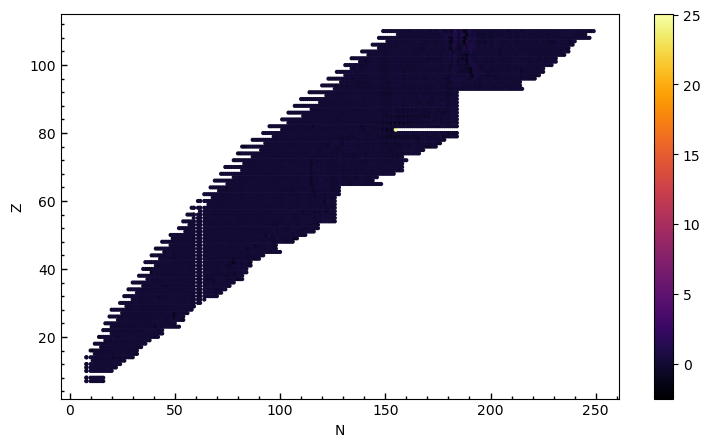

In [3]:
tested_df = result_summary.iloc[-1, :]
tested_mt = pd.read_csv(tested_df["output_file"])
print(np.sqrt((tested_mt["difference"] ** 2).mean()))
analysis.plot.nuclear_landscape(tested_mt["N"], tested_mt["Z"], tested_mt["difference"])

/tmp/ipykernel_6307/599972420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_df["note"] = variants_df["note"].astype(float)
/tmp/ipykernel_6307/599972420.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_df["variant_id"] = variant_id
/tmp/ipykernel_6307/599972420.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note,variant_id,nod
109,2025-06-14 12:56,Variant:1420_Dataset:24.0%,data/run/2025-06-14 12:52/config_1420_0.3.toml,data/result/2025-06-14 12:56_Variant:1420_Data...,data/result/2025-06-14 12:56_Variant:1420_Data...,0.421007,0.011913,0.420838,data/result/2025-06-14 12:56_Variant:1420_Data...,0:04:34.106080,1920.0,1420,24.0%
110,2025-06-14 13:01,Variant:1420_Dataset:48.0%,data/run/2025-06-14 12:52/config_1420_0.6.toml,data/result/2025-06-14 13:01_Variant:1420_Data...,data/result/2025-06-14 13:01_Variant:1420_Data...,0.366073,0.002381,0.366065,data/result/2025-06-14 13:01_Variant:1420_Data...,0:07:09.662293,3840.0,1420,48.0%
111,2025-06-14 13:08,Variant:1420_Dataset:64.0%,data/run/2025-06-14 12:52/config_1420_0.8.toml,data/result/2025-06-14 13:08_Variant:1420_Data...,data/result/2025-06-14 13:08_Variant:1420_Data...,0.379817,0.006227,0.379766,data/result/2025-06-14 13:08_Variant:1420_Data...,0:20:21.832247,5120.0,1420,64.0%
112,2025-06-14 13:28,Variant:1420_Dataset:80.0%,data/run/2025-06-14 12:52/config_1420_1.0.toml,data/result/2025-06-14 13:28_Variant:1420_Data...,data/result/2025-06-14 13:28_Variant:1420_Data...,0.346416,0.000955,0.346415,data/result/2025-06-14 13:28_Variant:1420_Data...,0:12:05.886105,6400.0,1420,80.0%
113,2025-06-14 13:40,Variant:3123_Dataset:24.0%,data/run/2025-06-14 12:52/config_3123_0.3.toml,data/result/2025-06-14 13:40_Variant:3123_Data...,data/result/2025-06-14 13:40_Variant:3123_Data...,0.227248,0.001766,0.227241,data/result/2025-06-14 13:40_Variant:3123_Data...,0:05:01.182754,1920.0,3123,24.0%


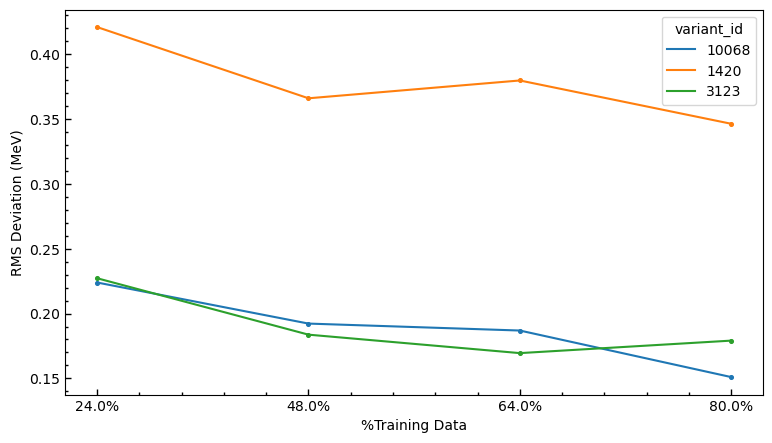

In [4]:
variants_df = result_summary.iloc[109:121]
# variants_df = pd.concat([result_summary.iloc[33:43], variants_df])
# variants_df.loc[variants_df.index[:10], "run_name"] = "Variant:3123,Data"
variants_df["note"] = variants_df["note"].astype(float)
variants_df.loc[variants_df.index[:10], "note"] *= 80

variant_id = [
    var_str.split("_")[0].split(":")[1] for var_str in variants_df["run_name"].values
]
nod = [
    var_str.split("_")[1].split(":")[1] for var_str in variants_df["run_name"].values
]
variants_df["variant_id"] = variant_id
variants_df["nod"] = nod


fig, ax = plt.subplots(figsize=(9, 5))
for label, group in variants_df.groupby("variant_id"):
    ax.plot(group["nod"], group["rms_dev"], label=label)
    ax.scatter(group["nod"], group["rms_dev"], s=7)
    analysis.plot.set_tick(ax)

ax.set_xlabel("%Training Data")
ax.set_ylabel("RMS Deviation (MeV)")
ax.legend(title="variant_id")
variants_df.head()

In [19]:
# Calculate mae
teee = [109, 113, 120]

for tes in teee:
    checked_ori = pd.read_csv(variants_df.loc[tes, "output_file"])
    print(
        f'mean: {checked_ori["target"].mean():.3f}, rms: {np.sqrt((checked_ori["target"] ** 2).mean()):.2f}'
    )

mean: 1.570, rms: 2.37
mean: -0.403, rms: 0.92
mean: -0.163, rms: 0.44


Text(0.5, 1.0, 'Mass Excess Difference of Several Models on A=195 Chain')

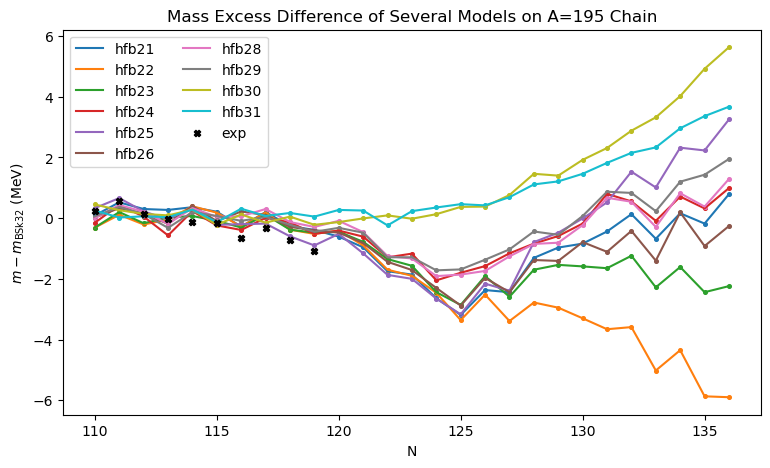

In [6]:
bsks_dir = Path("data/others/bsks_mt")
bsks_files = sorted([f for f in bsks_dir.iterdir() if f.is_file()])
models = [f.name.split("-")[0] for f in bsks_files]

bsks_list = []

for id in range(20, 32):
    df = pd.read_csv(bsks_files[id], sep="\\s+", skiprows=[0, 2])
    df.insert(1, "N", df["A"] - df["Z"])
    df.insert(0, "model", models[id])
    df.rename(columns={"Mexp-Mcal": "diff", "Mcal": "m"}, inplace=True)
    df = df[["model", "Z", "N", "A", "m"]]
    df = df[(df["A"] == 195) & (df["Z"] <= 85) & (df["N"] >= 110)]

    bsks_list.append(df)

bsks_df = pd.concat(bsks_list[:-1], ignore_index=True)
bsks_df = pd.merge(bsks_df, bsks_list[-1], on=["Z", "N", "A"], how="inner")
bsks_df.rename(columns={"model_x": "model", "m_x": "m", "m_y": "m_bsk32"}, inplace=True)
bsks_df.drop("model_y", axis=1)
bsks_df["diff"] = bsks_df["m"] - bsks_df["m_bsk32"]

plt.figure(figsize=(9, 5))
for label, group in bsks_df.groupby("model"):
    plt.scatter(group["N"], group["diff"], s=7)
    plt.plot(group["N"], group["diff"], label=label)

mexp = pd.read_csv("data/others/bsks_mt/hfb32-dat", sep="\\s+", skiprows=[0, 2])
mexp.insert(1, "N", mexp["A"] - mexp["Z"])
mexp.insert(0, "model", "hfb32")
mexp.rename(columns={"Mexp-Mcal": "diff", "Mcal": "m"}, inplace=True)
mexp = mexp[mexp["diff"] < 990]
mexp = mexp[(mexp["A"] == 195) & (mexp["Z"] <= 85) & (mexp["N"] >= 110)]

plt.scatter(
    mexp["N"], mexp["diff"], s=20, label="exp", zorder=30, marker="X", color="black"
)

plt.xlabel("N")
plt.ylabel(r"$m - m_\text{BSk32}$ (MeV)")
plt.legend(ncol=2)
plt.title("Mass Excess Difference of Several Models on A=195 Chain")

In [7]:
# Analyse the mae of all BSk24 Variants
from input.load import load_df
from input.feature import relative_mass

_, mt = load_df("variant", "ext_sample")
mt = relative_mass(mt)

mt = mt.groupby(by=["varian_id"], as_index=False).mean()
mt = mt[["varian_id", "m"]]
mt

,varian_id,m
0,1,0.161046
1,2,0.707171
2,3,0.316100
3,4,-0.475696
4,5,0.319607
...,...,...
2495,2496,-0.451516
2496,2497,-0.108700
2497,2498,-0.504204
2498,2499,-0.374547


Text(0, 0.5, 'Frequency')

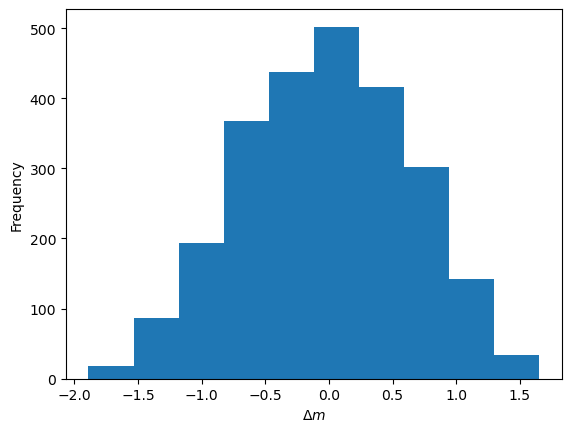

In [8]:
plt.hist(mt["m"])
plt.xlabel(r"$\Delta m$")
plt.ylabel("Frequency")

In [9]:
variant_low_mae = [13, 1529, 1068]
variant_high_mae = [419, 694, 1420]
variant_medh_mae = [2484, 2481, 15]
variant_medl_mae = [2498, 2494, 2480]
variant_mid_mae = [2482, 12, 1]
vart = [13, 1529, 1068, 2498, 2494, 2480, 2482, 12, 1, 2484, 2481, 15, 419, 694, 1420]

In [ ]:
test_mae_df = result_summary.loc[121:136]
test_mae_df

aaa = []
bbb = []
ccc = []
ddd = []
uuu = []
ooo = []

for i in range(121, 136):
    aaa.append(test_mae_df.loc[i, "run_name"].split("_")[1])

    dataset_out = pd.read_csv(test_mae_df.loc[i, "output_file"])
    uuu.append(np.sqrt(dataset_out["prediction"] ** 2).mean())
    ooo.append(dataset_out["prediction"].std())
    bbb.append(np.sqrt((dataset_out["target"] ** 2).mean()))
    ccc.append(dataset_out["target"].mean())
    ddd.append(dataset_out["target"].std())

res = {
    "variant_id": aaa,
    "rms_dev": test_mae_df["rms_dev"],
    "drms": np.array(uuu) - np.array(bbb),
    "r_std": (np.array(ooo) - np.array(ddd)) / np.array(ddd),
    "rms": uuu,
    "mae": test_mae_df["mae"],
    "std_diff": test_mae_df["std_diff"],
    "target_rms": bbb,
    "target_mae": ccc,
    "target_std": ddd,
}
res_df = pd.DataFrame(res)
res_df

,variant_id,rms_dev,drms,r_std,rms,mae,std_diff,target_rms,target_mae,target_std
121,13,0.153552,-0.552643,0.995427,1.559390,0.000310,0.153551,2.112033,-1.532085,1.453867
122,1529,0.161180,-0.787369,0.997994,1.961169,0.000854,0.161178,2.748538,-1.721952,2.142443
123,1068,0.129624,-0.889868,1.000041,2.089230,0.001762,0.129612,2.979098,-1.920371,2.277721
124,2498,0.161891,-0.262733,0.986130,0.774617,-0.000178,0.161891,1.037350,-0.554435,0.876822
125,2494,0.157240,-0.330223,0.984816,0.909694,0.000651,0.157239,1.239916,-0.821016,0.929226
126,2480,0.254915,-0.462563,0.992525,1.030785,-0.002677,0.254901,1.493348,-0.914703,1.180519
127,2482,0.279843,-0.206029,0.877082,0.415296,-0.001030,0.279841,0.621326,-0.083887,0.615685
128,12,0.158899,-0.173495,0.958797,0.395202,0.000727,0.158897,0.568696,0.031430,0.567872
129,1,0.170401,-0.139096,0.913682,0.302385,-0.002329,0.170385,0.441481,0.115100,0.426246
130,2484,0.137615,-0.178795,0.978527,0.617053,-0.000548,0.137614,0.795848,0.474157,0.639229


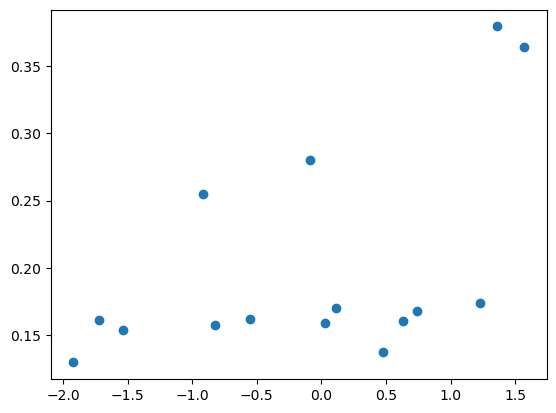

In [41]:
plt.scatter(res_df["target_mae"], res_df["rms_dev"])

In [42]:
rres = res_df[["rms_dev", "drms", "r_std"]]
ttar = res_df[["target_rms", "target_mae", "target_std"]]

pd.concat([rres, ttar], axis=1).corr().round(3)

,rms_dev,drms,r_std,target_rms,target_mae,target_std
rms_dev,1.000,-0.185,-0.314,0.142,0.522,0.123
drms,-0.185,1.000,-0.579,-0.988,0.292,-0.995
r_std,-0.314,-0.579,1.000,0.626,-0.301,0.611
target_rms,0.142,-0.988,0.626,1.000,-0.310,0.990
target_mae,0.522,0.292,-0.301,-0.310,1.000,-0.335
target_std,0.123,-0.995,0.611,0.990,-0.335,1.000


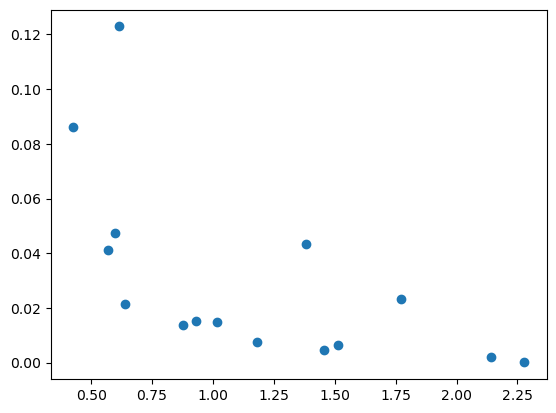

In [50]:
plt.scatter(ttar["target_std"], np.abs(rres["r_std"] - 1))